<a href="https://colab.research.google.com/github/mounikasrinivasarao/FMML-Projects-Labs/blob/main/FMML_Aug'22_M9_L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Foundation of Modern Machine Learning
## Module 9: Neural Networks
## Lab 2: Using MLP for multiclass classification
#### Module Coordinator: Shantanu Agrawal




Till now, we got to know what is MLP, how it can be used for classification. We have done the single class classification in the previous lab session.

In this notebook we will try to use an MLP for multiclass classification on the iris dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data preparation

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# Scale data to have mean 0 and variance 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2)

# Visualising dataset

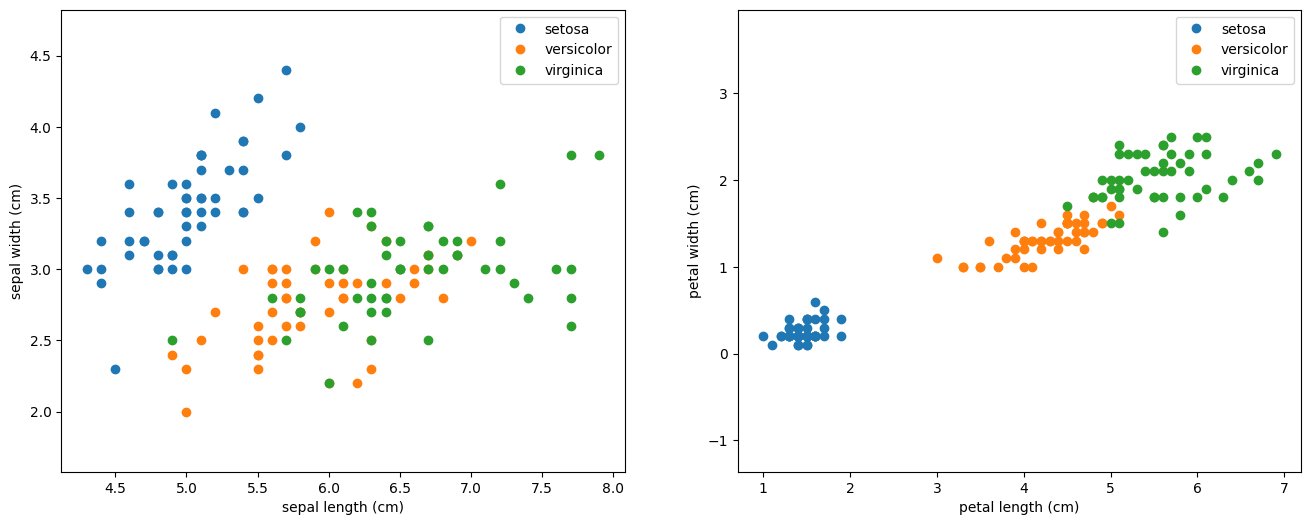

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax1.plot(X_plot[:, 0], X_plot[:, 1],
             linestyle='none',
             marker='o',
             label=target_name)
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend();

for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax2.plot(X_plot[:, 2], X_plot[:, 3],
             linestyle='none',
             marker='o',
             label=target_name)
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend();


# Observing the dataset

Thus, we can observe the dataset and see that there are *3 classes, setosa, versicolor, and virginica*.

There are *4 features, sepal width, sepal length, petal width, petal length*.

# MLP for multiclass classification

In [4]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable
import tqdm

In [5]:
# Defining the model architecture
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [6]:
# Instantiating the model, using Adam optimiser, and Cross Entropy Loss, which is quite commonlu used for classification tasks.
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

# Train the model

In [7]:
# Train for 100 epochs
EPOCHS  = 100
X_train = torch.from_numpy(X_train).float()
X_test= torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test)
y_train = torch.from_numpy(y_train)


loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()

    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

100%|██████████| 100/100 [00:00<00:00, 261.33it/s]


# Plot training progress

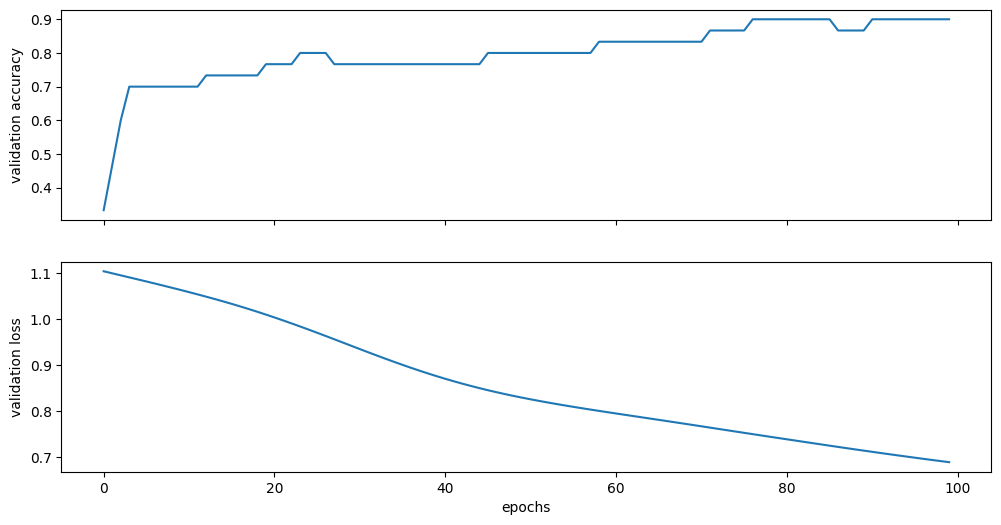

In [8]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");

# Experiment with the neural network architecture


1.   Try changing the number of hidden layers.
2.   Try changing the number of neurons in the hidden layer.
3.   Try using a different activation function.




Can you observe any changes?

**Try changing the number of hidden layers.**

In [9]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define a function to create a neural network with a variable number of hidden layers
def create_model(num_hidden_layers):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    for _ in range(num_hidden_layers):
        model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

# Train and evaluate models with different numbers of hidden layers
for num_layers in range(1, 4):
    model = create_model(num_layers)
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=5)
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print("Number of Hidden Layers:", num_layers)
    print("Test Accuracy:", test_acc)


11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2581 - accuracy: 0.9258
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1117 - accuracy: 0.9672
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0778 - accuracy: 0.9761
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0579 - accuracy: 0.9814
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0816 - accuracy: 0.9743
Number of Hidden Layers: 1
Test Accuracy: 0.9743000268936157
Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2313 - accuracy: 0.9331
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0972 - accuracy: 0.9702
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0678 - accuracy: 0.9783
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step

**Try changing the number of neurons in the hidden layer.**

In [10]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define a function to create a neural network with a variable number of neurons in the hidden layers
def create_model(num_neurons):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(num_neurons, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

# Train and evaluate models with different numbers of neurons in the hidden layer
for num_neurons in [64, 128, 256]:
    model = create_model(num_neurons)
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=5)
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print("Number of Neurons in Hidden Layer:", num_neurons)
    print("Test Accuracy:", test_acc)


Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3017 - accuracy: 0.9144
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1438 - accuracy: 0.9579
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1037 - accuracy: 0.9694
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0823 - accuracy: 0.9751
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0943 - accuracy: 0.9687
Number of Neurons in Hidden Layer: 64
Test Accuracy: 0.9686999917030334
Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2615 - accuracy: 0.9250
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1155 - accuracy: 0.9659
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0768 - accuracy: 0.9768
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0566 - accuracy: 0.9828
Epoch 5/5
313/313 [==

**Try using a different activation function.**

In [11]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define a function to create a neural network with different activation functions for the hidden layers
def create_model(activation_func):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(128, activation=activation_func))
    model.add(Dense(10, activation='softmax'))
    return model

# Train and evaluate models with different activation functions for the hidden layers
activation_functions = ['tanh', 'relu']
for activation_func in activation_functions:
    model = create_model(activation_func)
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=5)
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print("Activation Function:", activation_func)
    print("Test Accuracy:", test_acc)


Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2801 - accuracy: 0.9191
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1330 - accuracy: 0.9617
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0893 - accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0654 - accuracy: 0.9808
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0708 - accuracy: 0.9779
Activation Function: tanh
Test Accuracy: 0.9779000282287598
Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2571 - accuracy: 0.9266
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1145 - accuracy: 0.9660
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0793 - accuracy: 0.9758
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0609 - accuracy: 0.9813
Epoch 5/5
313/313 [==============